# Working with HEALPix data

[HEALPix](https://healpix.jpl.nasa.gov/) (Hierarchical Equal Area isoLatitude Pixelisation) is an algorithm that is often used to store data from all-sky surveys.

There are several tools in the Astropy ecosystem for working with HEALPix data, depending on what you need to do:

* The [astropy-healpix](https://astropy-healpix.readthedocs.io/en/latest/index.html) coordinated package is a BSD-licensed implementation of HEALPix which focuses on being able to convert celestial coordinates to HEALPix indices and vice-versa, as well as providing a few other low-level functions.

* The [reproject](https://reproject.readthedocs.io/en/stable/) coordinated package (which we've already looked at) includes functions for converting from/to HEALPix maps.

* The [HiPS](https://hips.readthedocs.io/en/latest/) affiliated package implements suport for the [HiPS](http://aladin.u-strasbg.fr/hips/) scheme for storing data that is based on HEALPix.

In this tutorial, we will take a look at the two first one of these, but we encourage you to learn more about HiPS too!

To install astropy-healpix and reproject uncomment the following cells:

In [ ]:
# !pip install astropy-healpix

In [ ]:
# !pip install reproject


<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Objectives</h2>
</div>


<div class="panel-body">

<ul>
<li>Convert between celestial coordinates and HEALPix indices</li>
<li>Find the boundaries of HEALPix pixels</li>
<li>Find healpix pixels close to a position</li>
<li>Reproject a HEALPix map to a standard projection</li>
</ul>

</div>

</section>


## Documentation

This notebook only shows a subset of the functionality in astropy-healpix and reproject. For more information about the features presented below as well as other available features, you can read the
[astropy-healpix](https://astropy-healpix.readthedocs.io/en/latest/index.html) and the [reproject](https://reproject.readthedocs.io/en/stable/) documentation.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))

## Data

For this tutorial, we will be using a downsampled version of the Planck HFI 857Ghz map which is stored as a HEALPix map ([data/HFI_SkyMap_857_2048_R1.10_nominal_ZodiCorrected_lowres.fits](data/HFI_SkyMap_857_2048_R1.10_nominal_ZodiCorrected_lowres.fits)).

## Using astropy-healpix

To start off, we can open the HEALPix file (which is a FITS file) with astropy.io.fits:

In [2]:
from astropy.io import fits
hdulist = fits.open('data/HFI_SkyMap_857_2048_R1.10_nominal_ZodiCorrected_lowres.fits')
hdulist.info()

Filename: data/HFI_SkyMap_857_2048_R1.10_nominal_ZodiCorrected_lowres.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FREQ-MAP      1 BinTableHDU     62   786432R x 1C   [E]   


The HEALPix map values are stored in HDU 1. This HDU also contains useful header information that helps us understand how to interpret the HEALPix values:

In [4]:
hdulist[1].header['NSIDE']

256

In [5]:
hdulist[1].header['ORDERING']

'NESTED'

In [7]:
hdulist[1].header['COORDSYS']

'GALACTIC'

With this information we can now construct a ``HEALPix`` object:

In [8]:
from astropy_healpix import HEALPix
from astropy.coordinates import Galactic

In [9]:
hp = HEALPix(nside=hdulist[1].header['NSIDE'],
             order=hdulist[1].header['ORDERING'],
             frame=Galactic())

We can then use this object to manipulate the HEALPix map. To start off, we can find out what the coordinates of specific pixels are:

In [10]:
hp.healpix_to_skycoord([13322, 2231, 66432])

<SkyCoord (Galactic): (l, b) in deg
    [( 50.09765625, 25.28260304), ( 38.3203125 ,  7.93333655),
     (133.59375   ,  6.12920146)]>

and vice-versa:

In [11]:
from astropy.coordinates import SkyCoord
hp.skycoord_to_healpix(SkyCoord.from_name('M31'))

649476

You can also find out what the boundaries of a pixel are:

In [13]:
edge = hp.boundaries_skycoord(649476, step=100)
edge

<SkyCoord (Galactic): (l, b) in deg
    [[(121.2890625 , -21.38194258), (121.28730469, -21.38354496),
      (121.28554687, -21.38514735), (121.28378906, -21.38674976),
      (121.28203125, -21.38835219), (121.28027344, -21.38995464),
      (121.27851563, -21.3915571 ), (121.27675781, -21.39315958),
      (121.275     , -21.39476208), (121.27324219, -21.3963646 ),
      (121.27148438, -21.39796713), (121.26972656, -21.39956968),
      (121.26796875, -21.40117225), (121.26621094, -21.40277484),
      (121.26445313, -21.40437744), (121.26269531, -21.40598006),
      (121.2609375 , -21.4075827 ), (121.25917969, -21.40918536),
      (121.25742187, -21.41078804), (121.25566406, -21.41239073),
      (121.25390625, -21.41399344), (121.25214844, -21.41559616),
      (121.25039062, -21.41719891), (121.24863281, -21.41880167),
      (121.246875  , -21.42040445), (121.24511719, -21.42200725),
      (121.24335938, -21.42361007), (121.24160156, -21.4252129 ),
      (121.23984375, -21.42681575), (121

The ``step`` argument controls how many points to sample along the edge of the pixel. The result should be a polygon:

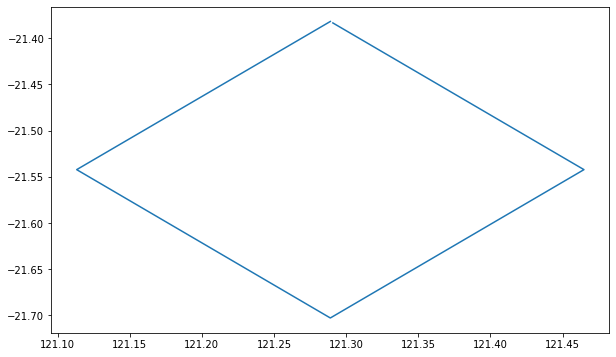

In [14]:
plt.plot(edge[0].l.deg, edge[0].b.deg)

You can find all HEALPix pixels within a certain radius of a known position:

In [15]:
from astropy import units as u
hp.cone_search_skycoord(SkyCoord.from_name('M31'), radius=1*u.deg)

array([649476, 649477, 649479, 649478, 649475, 649473, 648107, 648110,
       648111, 648122, 649488, 648108, 648109, 648120, 648121, 648123,
       648103, 648114, 648115, 648124, 648112, 648101, 648102, 648100,
       648099, 648097, 648098, 648096, 647927, 647925, 647926, 647933,
       647932, 647935, 647934, 647931, 649300, 649297, 649302, 649299,
       649308, 649305, 649310, 649311, 649333, 649309, 649480, 649482,
       649303, 649474, 649481, 649301, 649472, 648106, 648104, 648105,
       649484, 649486, 649483, 649508, 649505, 649504, 649507, 649510,
       649511, 649509, 649520, 649487, 649498, 649499, 649521, 649485,
       649496, 649497, 649500, 649490, 649491, 649494, 649489, 649492,
       648126])

And finally you can interpolate the map at specific coordinates:

In [16]:
hp.interpolate_bilinear_skycoord(SkyCoord.from_name('M31'), hdulist[1].data['I_STOKES'])

10.641902526953075


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Challenge</h2>
</div>


<div class="panel-body">

<ol>
<li>Find the mean value of I_STOKES within 2 degrees of M42</li>
<li>Use astropy.coordinates to check that all the pixels returned by the cone search are indeed within 2 degrees of M42 (if not, why not? Hint: check the documentation of <a href="https://astropy-healpix.readthedocs.io/en/latest/api/astropy_healpix.HEALPix.html#astropy_healpix.HEALPix.cone_search_skycoord">cone_search_skycoord()</a>)</li>
</ol>

</div>

</section>


## Using reproject for HEALPix data

The reproject package is useful for HEALPix data to convert a HEALPix map to a regular projection, and vice-versa. For example, let's define a simple all-sky Plate-Caree WCS:

In [17]:
from astropy.wcs import WCS
wcs = WCS(naxis=2)
wcs.wcs.ctype = 'GLON-CAR', 'GLAT-CAR'
wcs.wcs.crval = 0, 0
wcs.wcs.crpix = 180.5, 90.5
wcs.wcs.cdelt = -1, 1

We can now use [reproject_from_healpix](https://reproject.readthedocs.io/en/stable/api/reproject.reproject_from_healpix.html#reproject.reproject_from_healpix) to convert the HEALPix map to this header:

In [18]:
from reproject import reproject_from_healpix

In [24]:
array, footprint = reproject_from_healpix('data/HFI_SkyMap_857_2048_R1.10_nominal_ZodiCorrected_lowres.fits', 
                                          wcs, shape_out=(180, 360))

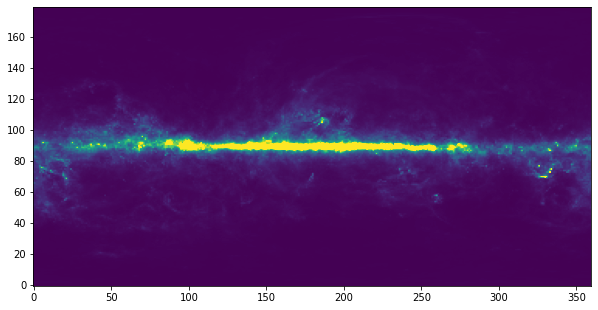

In [25]:
plt.imshow(array, vmax=100)

You can also use [reproject_to_healpix](https://reproject.readthedocs.io/en/stable/api/reproject.reproject_to_healpix.html#reproject.reproject_to_healpix) to convert a regular map to a HEALPix array.


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Challenge</h2>
</div>


<div class="panel-body">

<ol>
<li>Reproject the HFI HEALPix map to the projection of the GAIA point source density map as well as the IRAS map that we used in previous tutorials.</li>
<li>Visualize the results using WCSAxes and optionally the image normalization options.</li>
</ol>

</div>

</section>


<center><i>This notebook was originally written by <a href="https://aperiosoftware.com/">Aperio Software Ltd</a> and modified by Brigitta Sipőcz. &copy; 2019-2021 and is licensed under a <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License (CC BY 4.0)</a></i></center>

![cc](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg)